In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from fastai.basics import *

# import lmfit
# from lmfit.models import *
# from lmfit.lineshapes import *
# from lmfit import Parameters, fit_report, minimize

import pandas as pd

In [4]:
p = Path('../data/Raman Ana/1_16_19')
p.ls()

[PosixPath('../data/Raman Ana/1_16_19/Coal EL char oxidizer 3 okay too.spc'),
 PosixPath('../data/Raman Ana/1_16_19/coal EL oxidizer method 2.txt'),
 PosixPath('../data/Raman Ana/1_16_19/fig6.png'),
 PosixPath('../data/Raman Ana/1_16_19/coal el char oxidizer 2 better.txt'),
 PosixPath('../data/Raman Ana/1_16_19/coal hummers5.txt'),
 PosixPath('../data/Raman Ana/1_16_19/coal hummer 4.lib'),
 PosixPath('../data/Raman Ana/1_16_19/biochar oxidizer.spc'),
 PosixPath('../data/Raman Ana/1_16_19/coal hummers 2.lib'),
 PosixPath('../data/Raman Ana/1_16_19/fig5.png'),
 PosixPath('../data/Raman Ana/1_16_19/graphene oxide from graphenea company.spc'),
 PosixPath('../data/Raman Ana/1_16_19/fig4.png'),
 PosixPath('../data/Raman Ana/1_16_19/Coal EL char oxidizer.txt'),
 PosixPath('../data/Raman Ana/1_16_19/coal hummers 3.lib'),
 PosixPath('../data/Raman Ana/1_16_19/coal hummers5.spc'),
 PosixPath('../data/Raman Ana/1_16_19/Coal EL char oxidizer 3 okay too.txt'),
 PosixPath('../data/Raman Ana/1_16_19/

In [5]:
fnames = []
for n in p.glob('*.txt'): fnames.append(n.name)
fnames[:5]

['coal EL oxidizer method 2.txt',
 'coal el char oxidizer 2 better.txt',
 'coal hummers5.txt',
 'Coal EL char oxidizer.txt',
 'Coal EL char oxidizer 3 okay too.txt']

In [6]:
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""  # fastai work-around LazyConfigValue problem
df_ = pd.read_csv(p/fnames[0],names=['Energy',fnames[0]],header=None, delimiter = '\t')
df_.head()

,Energy,coal EL oxidizer method 2.txt
0,200.0,1833.458
1,201.0,1866.810
2,202.0,1900.162
3,203.0,1933.513
4,204.0,1955.474


In [7]:
def load_data(path, fnames):
    dfs=[]
    for f in fnames:
        dfs.append(pd.read_csv(path/f, names=['Energy',
                   f], header=None, delimiter = '\t'))
    return pd.concat(dfs,axis=1).T.drop_duplicates().T  # care: works only when all E column values are the same

In [9]:
df=load_data(p,fnames)
df.head()

,Energy,coal EL oxidizer method 2.txt,coal el char oxidizer 2 better.txt,coal hummers5.txt,Coal EL char oxidizer.txt,Coal EL char oxidizer 3 okay too.txt,graphene oxide from graphenea company.txt,biochar oxidizer.txt,coal hummers meio ruim.txt,coal EL char hummers 2.txt,...,coal hummer 4.txt,coal hummers 2.txt,coal hummers 3.txt,coal hummers 6.txt,coal EL hummers method 3_melhor.txt,biochar oxidizer 2.txt,coal EL hummers method 4.txt,coal EL hummers method 3.txt,coal EL hummers method 2.txt,coal EL oxidizer method.txt
0,200.0,1833.458,1042.890,1792.503,1463.463,1146.588,727.437,585.161,2518.469,1841.408,...,1625.800,1871.026,1512.885,2133.232,2061.599,1229.724,4046.232,1251.453,4061.152,817.0
1,201.0,1866.810,1080.411,1823.076,1502.652,1165.766,737.443,606.006,2563.493,1871.702,...,1668.879,1900.209,1544.569,2180.481,2092.449,1240.563,4093.481,1278.968,4125.632,830.0
2,202.0,1900.162,1117.932,1853.648,1541.840,1184.943,747.448,626.851,2608.518,1901.997,...,1711.959,1929.391,1576.254,2227.729,2123.299,1251.403,4140.729,1306.483,4190.112,843.0
3,203.0,1933.513,1155.453,1884.221,1581.028,1204.120,757.454,647.696,2653.543,1932.291,...,1755.038,1958.574,1607.938,2274.977,2154.150,1262.242,4187.977,1333.999,4254.592,856.0
4,204.0,1955.474,1184.486,1925.789,1619.607,1235.119,774.096,658.390,2693.607,1961.766,...,1787.973,1991.497,1645.850,2311.668,2195.789,1286.559,4232.338,1358.205,4320.751,866.0


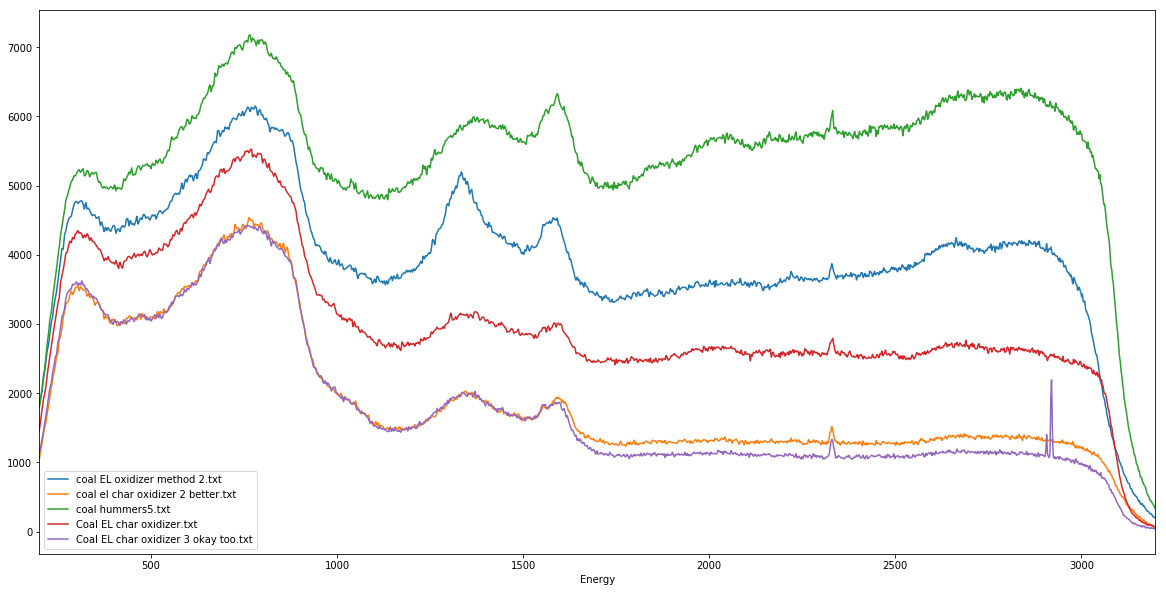

In [10]:
df.plot(x='Energy',y=fnames[:5],figsize=(20,10))

Text(0, 0.5, 'Intensity a.u.')

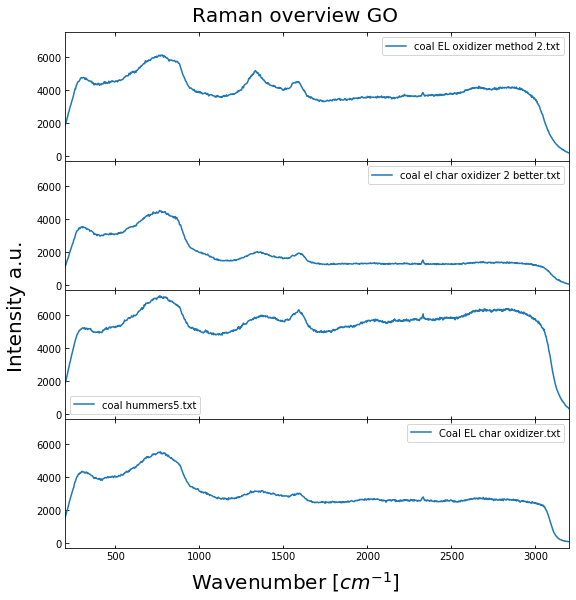

In [73]:
fig, axes = plt.subplots(nrows=4, ncols=1, 
                         sharex=True, sharey=True, figsize=(8,8))
df.plot(x='Energy', y=fnames[0], ax=axes[0])
df.plot(x='Energy', y=fnames[1], ax=axes[1])
df.plot(x='Energy', y=fnames[2], ax=axes[2])
df.plot(x='Energy', y=fnames[3], ax=axes[3])
fig.tight_layout()

# Bring subplots close to each other and positioned further to the right
fig.subplots_adjust(hspace=0, left=0.1, bottom=0.08)

# Hide x labels and tick labels for all but bottom plot.
for ax in axes:
    ax.xaxis.label.set_visible(False)
    ax.tick_params(axis='both', which='both', direction='in',top=True)
                    #     ax.label_outer()

fig.suptitle('Raman overview GO', y=1.02, fontsize=20)
fig.text(0.5, 0.01, r'Wavenumber [$cm^{-1}$]', fontsize=20, ha='center')
fig.text(0, 0.5, 'Intensity a.u.', fontsize=20, va='center', rotation='vertical')